╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 8. Auto Encoder**
# Section 3. Principal Component Analysis (2) Tensorflow로 구현하기

### _Objective_
1. PCA를 Tensorflow로 구현해보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import tensorflow as tf
import math
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._<br>

In [0]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))

    display(HTML(iframe))

## 예제 데이터 ) IRIS 데이터 셋

IRIS 데이터셋은 붓꽃에 대한 정보를 가진 데이터로, 총 4개의 Feature로 이루어져 있습니다.<br>
이 4개의 Feature는 서로 강한 상관관계를 가지고 있습니다.

In [0]:
iris_dataset = datasets.load_iris()

data = iris_dataset.data
target = iris_dataset.target

In [4]:
df = pd.DataFrame(data,columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<br><br>

# \[ 1. 텐서플로우로 PCA 구현하기 \]

----

----

> *이전 Chapter에서 다룬 PCA를 텐서플로우로 코드를 구성해보도록 하겠습니다.*<br>
> *Numpy와 달리, 텐서플로우의 Indexing은 까다롭기 때문에, 좀 더 복잡하게 코드를 작성해야 합니다. *<br>

## 1. Graph 구성하기
---


### 1) placeholder 구성하기

In [0]:
graph = tf.Graph()
with graph.as_default():
    x = tf.placeholder(tf.float32,(None,None), name='x')
    num_pc = tf.placeholder_with_default(2,None,name="num_pc")

In [6]:
show_graph(graph)

### 2) 공분산 행렬 Graph 구현하기

In [0]:
with graph.as_default():
    # Calculate Covariance Matrix
    with tf.variable_scope("covariance_matrix"):
        #fix me #
    cov_x = tf.identity(cov_x,"cov_matrix")

In [0]:
show_graph(graph)

### 3) 고윳값 분해 구현하기

In [0]:
with graph.as_default():
    # Eigen Value Decomposition
    with tf.variable_scope("decomposition"):
        # eigen vector , eigen value 을 구합니다.
        # fix me #
        
    eigen_value = tf.identity(eigen_value, "eigen_value")
    eigen_vector = tf.identity(eigen_vector, "eigen_vector")

In [0]:
show_graph(graph)

### 4) 계산된 고유 벡터로 주성분 계산하기

In [0]:
with graph.as_default():
    # Principal Component Analysis
    with tf.variable_scope("principal_component"):
        # eigen vector 을 이용해 데이터를 복원합니다.
    
    pca_x = tf.identity(pca_x, "pca")
    reconstructed_x = tf.identity(reconstructed_x, "reconstructed_x")

In [0]:
show_graph(graph)

### 5) 정보량 지표 구현하기

In [0]:
with graph.as_default():
    with tf.variable_scope("metric"):
        # eigen value 가 축적 됨에 따라 
    info_ratio = tf.identity(info_ratio,name="eigenvalue_ratio")

In [0]:
show_graph(graph)

## 2. 결과 확인하기
---


In [0]:
sess = tf.Session(graph=graph)

### 1) 주성분이 1개인 경우

In [0]:
result = sess.run(info_ratio, feed_dict={x:data,num_pc:1})
print("보존하려는 분산의 비율 : {:2.3f}%".format(result*100))

보존하려는 분산의 비율 : 97.769%


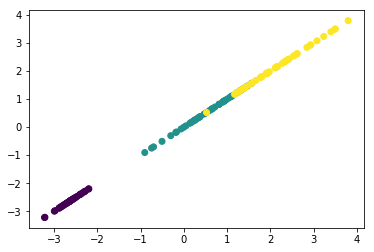

In [0]:
sess = tf.Session(graph=graph)
# 주성분이 한개인 경우 시각화을 진행합니다. 
# x 축에 z , y 축에 z 을 
pca_result = sess.run(#fix me#) 
plt.scatter(#fix me # ,#fix me # , c=target)
plt.show()

### 1) 주성분이 2개인 경우

In [0]:
# 보존 비율을 출력 합니다.
result = sess.run(#fix me# , feed_dict={#fix me #})
print("보존하려는 분산의 비율 : {:2.3f}%".format(result*100))

보존하려는 분산의 비율 : 99.479%


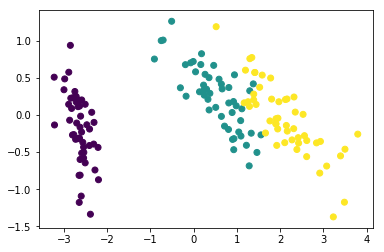

In [0]:
# 2차원으로 시각화 합니다. 
# 분산이 가장큰 2개의 eigen vector로 데이터 x 을 투영합니다.  
pca_result = sess.run(#fix me# )
plt.scatter(#fix me # , c=target)
plt.show()

### 3) 주성분이 3개인 경우

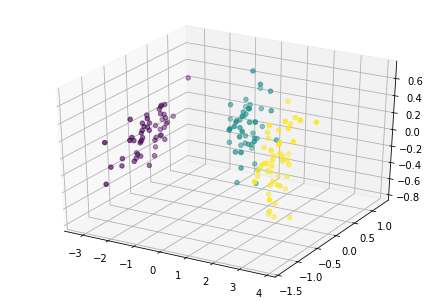

In [0]:
# 3차원으로 시각화 합니다. 
# 분산이 가장큰 eigen vector 부터 차례대로 작은 분산

pca_result = sess.run(#fix me #)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_result[:,0],
           pca_result[:,1],
           pca_result[:,2],
           c=target)
plt.show()

## 3. MNIST에 PCA 적용하기
---

* 이미지에 PCA를 적용해보도록 하겠습니다.

### (1) MNIST 가져오기

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")

# 이미지와 라벨 가져오기
images = mnist.train.images
target = mnist.train.labels

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


### (2) PCA로 차원축소하여 군집화해보기

In [0]:
# mnist data 을 3차원으로 축소해 군집화 합니다. 
pca_result = sess.run(#fix me# ,feed_dict={# fix me #})

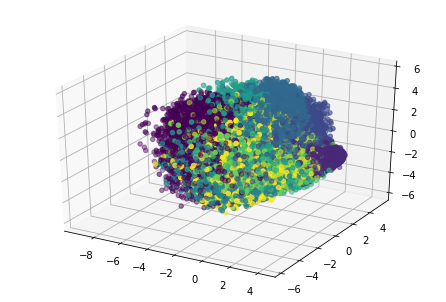

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_result[:,0],
           pca_result[:,1],
           pca_result[:,2],
           c=target)
plt.show()

### (3) 재구축하여 하여 이전 이미지와 비교하기

#### 100 차원으로 차원축소 후 재구축하기

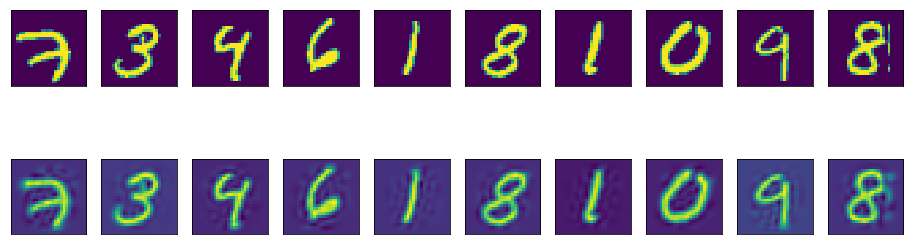

In [0]:
# eigen vector 을 이용해 데이터를 100 차원으로 축소합니다.
# 해당 eigen vector 을 이용해 data을 재 구축합니다.
reconstruction = sess.run(#fix me#)

fig, (ax1, ax2) = plt.subplots(2,10, figsize=(16,5))

for i in range(10):
    ax = ax1[i]
    ax.set_xticks([])
    ax.set_yticks([])    
    # mnist 데이터를 이미지로 reshape 한 후 시각화 합니다.
    ax.imshow(# #)
    
for i in range(10):
    ax = ax2[i]
    ax.set_xticks([])
    ax.set_yticks([])
    # pca 복원된 mnist 데이터를 28,28 로 reshape 한 후 시각화 합니다. 
    ax.imshow(# fix me # )

plt.show()

In [0]:
# 복원된 데이터와 실제데이터의 rmse 을 구합니다. 
rmse = np.sqrt(np.mean(#fix me # )
print("100차원으로 축소했을 때의 오차(RMSE) : {:.3f}".format(rmse))

100차원으로 축소했을 때의 오차(RMSE) : 0.076


#### 200차원으로 차원축소 후 재구축하기

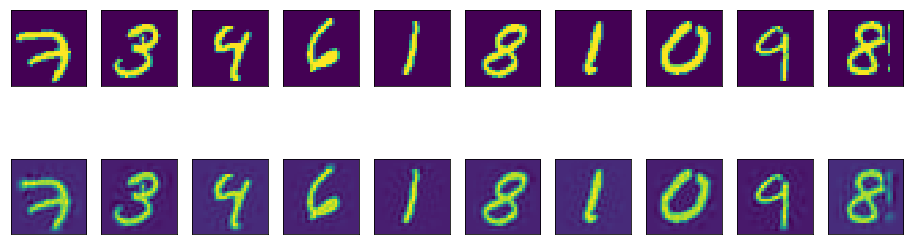

In [0]:
# eigen vector 을 이용해 데이터를 200 차원으로 축소합니다.
# 해당 eigen vector 을 이용해 data을 재 구축합니다.

reconstruction = sess.run(#fix me#)

fig, (ax1, ax2) = plt.subplots(2,10, figsize=(16,5))

for i in range(10):
    ax = ax1[i]
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(#fix me#)
    
for i in range(10):
    ax = ax2[i]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(#fix me#)

plt.show()

In [0]:
rmse = np.sqrt(np.mean(# fix me # )
print("200차원으로 축소했을 때의 오차(RMSE) : {:.3f}".format(rmse))

200차원으로 축소했을 때의 오차(RMSE) : 0.047


#### 10차원으로 차원축소 후 재구축하기

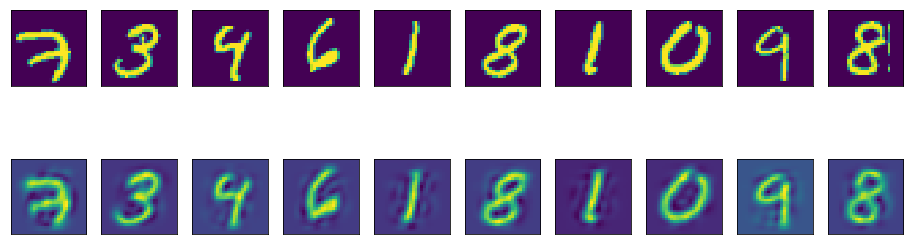

In [0]:
# eigen vector 을 이용해 데이터를 10 차원으로 축소합니다.
# 해당 eigen vector 을 이용해 data을 재 구축합니다.

reconstruction = sess.run(# fix me #)

fig, (ax1, ax2) = plt.subplots(2,10, figsize=(16,5))

for i in range(10):
    ax = ax1[i]
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(#fix me#)
    
for i in range(10):
    ax = ax2[i]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(#fix me #)

plt.show()

In [0]:
rmse = np.sqrt(np.mean((images - reconstruction)**2))
print("50차원으로 축소했을 때의 오차(RMSE) : {:.3f}".format(rmse))

50차원으로 축소했을 때의 오차(RMSE) : 0.109


<br><br>

# \[ 2. Tensorboard 내 PCA 이용해보기 \]

----

----

> *PCA는 가장 대표적인 차원축소 기법으로, 데이터를 탐색할 때 많이 이용하는 알고리즘입니다.*<br>
> *Tensorflow에서는 이를 효과적으로 시각화하는 Projector라는 클래스를 제공합니다.*<br>

In [0]:
from tensorflow.contrib.tensorboard.plugins import projector
from tensorboardcolab import TensorBoardColab

### 1) 이미지 불러오기

In [0]:
mnist = input_data.read_data_sets("mnist_data/")

images = mnist.test.images
labels = mnist.test.labels

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


### 2) 로그 폴더 만들기

In [0]:
log_dir = "logs/"
metadata_name = "metadata.tsv"
image_path = "sprite.png"
os.makedirs(log_dir,exist_ok=True)
tbc = TensorBoardColab(graph_path=log_dir)

### 3) 이미지를 텐서플로우 변수로 저장

In [0]:
graph = tf.Graph()
with graph.as_default():
    tf_images = tf.Variable(images, name='images')

Instructions for updating:
Colocations handled automatically by placer.


### 4) 라벨 정보를 저장

In [0]:
os.makedirs(log_dir,exist_ok=True)
metadata_path = os.path.join(log_dir, metadata_name)
with open(metadata_path, "w") as f:
    f.write('Index\tLabel\n')
    for idx, row in enumerate(labels):
        f.write("{}\t{}\n".format(idx, row))

### 6) 임베딩하기 

In [0]:
with tf.Session(graph=graph) as sess:
    saver = tf.train.Saver([tf_images])
    
    sess.run(tf_images.initializer)
    saver.save(sess, os.path.join(log_dir, "images.ckpt"))
    
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_images.name
    embedding.metadata_path = metadata_name
    projector.visualize_embeddings(tf.summary.FileWriter(log_dir),config)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/14

---